In [54]:
import sys
import pandas as pd
import numpy as np
sys.path.append('topotests/')
from topotests.topotests import TopoTestOnesample

# import some random variables (RV) generators
from scipy.stats import norm, multivariate_normal, t, multivariate_t, uniform 
# import univariate Kolmogorov-Smirnov test
from scipy.stats import kstest, shapiro, probplot

# set random number generator seed for reproducibility
np.random.seed(seed=12345)

In [58]:
# create some random variabes used to generate data
# TopoTest requires that RV has a rvs(size) method that returns a random sample from null distribution


# first let's create the standard normal RV and a RV that represents a Student's distribution with df=3 degrees df is defined later) of freedom
rv_norm = norm
rv_t = t(df=3)
rv_uniform = uniform(-1,2)

# draw samples from this distriutions
n = 5000 # sample size
sample_norm = rv_norm.rvs(size=n)
sample_t = rv_t.rvs(size=n)

# set the significance level
alpha=0.05

In [59]:
tt = TopoTestOnesample(n=n, dim=1, significance_level=alpha)

In [60]:
tt.fit(rv=rv_norm, n_signature=1000)

In [61]:
n_loops = 100
tt_pvals = np.zeros(n_loops)
ks_pvals = np.zeros(n_loops)
sw_pvals = np.zeros(n_loops)

for i in range(n_loops):
    sample_norm = rv_norm.rvs(size=n)
    samples = sample_norm.copy()
    samples += np.tile(np.array([1,0,2,0,1]),n//5)
    tt_pvals[i] = tt.predict(samples).pvalue
    ks_pvals[i] = kstest(samples,cdf=rv_norm.cdf).pvalue
    sw_pvals[i] = shapiro(samples).pvalue

In [62]:
print('TopoTest:' ,np.mean(tt_pvals<0.05))
print('KS test:' ,np.mean(ks_pvals<0.05))
print('Shapiro:' ,np.mean(sw_pvals<0.05))

TopoTest: 1.0
KS test: 1.0
Shapiro: 0.74


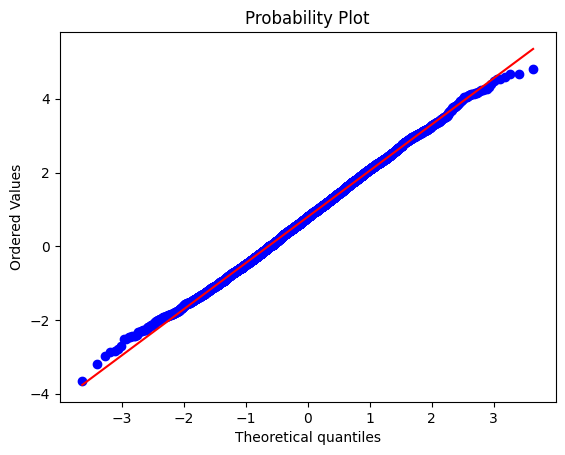

In [63]:
import matplotlib.pyplot as plt
f,ax = plt.subplots()
probplot(samples, dist="norm", plot=ax)
plt.show()